In [1]:
!pip3 install torch torchvision

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torchvision import datasets, transforms, models

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
!git clone https://github.com/jaddoescad/ants_and_bees.git

fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [5]:
from torch.nn.modules.activation import Tanhshrink
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10,scale=(0.8,1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1,saturation=1),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5,),(0.5,))])                                         # Data Augumentation
transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
training_dataset = datasets.ImageFolder('ants_and_bees/train',transform=transform_train)
validation_dataset = datasets.ImageFolder('ants_and_bees/val',transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=20, shuffle=False)


In [6]:
!ls

ants_and_bees  data  downloaded_image.jpg  sample_data


In [7]:
!ls ants_and_bees

train  val


In [8]:
!ls ants_and_bees/train

ants  bees


In [9]:
!ls ants_and_bees/train/ants

 0013035.jpg		     2288450226_a6e96e8fdf.jpg	 533848102_70a85ad6dd.jpg
 1030023514_aad5c608f9.jpg   2288481644_83ff7e4572.jpg	 535522953_308353a07c.jpg
 1095476100_3906d8afde.jpg   2292213964_ca51ce4bef.jpg	 540889389_48bb588b21.jpg
 1099452230_d1949d3250.jpg   24335309_c5ea483bb8.jpg	 541630764_dbd285d63c.jpg
 116570827_e9c126745d.jpg    245647475_9523dfd13e.jpg	 543417860_b14237f569.jpg
 1225872729_6f0856588f.jpg   255434217_1b2b3fe0a4.jpg	 560966032_988f4d7bc4.jpg
 1262877379_64fcada201.jpg   258217966_d9d90d18d3.jpg	 5650366_e22b7e1065.jpg
 1269756697_0bce92cdab.jpg   275429470_b2d7d9290b.jpg	 6240329_72c01e663e.jpg
 1286984635_5119e80de1.jpg   28847243_e79fe052cd.jpg	 6240338_93729615ec.jpg
 132478121_2a430adea2.jpg    318052216_84dff3f98a.jpg	 649026570_e58656104b.jpg
 1360291657_dc248c5eea.jpg   334167043_cbd1adaeb9.jpg	 662541407_ff8db781e7.jpg
 1368913450_e146e2fb6d.jpg   339670531_94b75ae47a.jpg	 67270775_e9fdf77e9d.jpg
 1473187633_63ccaacea6.jpg   342438950_a3da61deab.jpg	 6

In [10]:
print(len(training_dataset))
print(len(validation_dataset))
print(f"number of batches = {len(training_loader)} i.e ceil(244/20)")
print(f"number of total images in training loader: {len(training_loader.dataset)}")

244
153
number of batches = 13 i.e ceil(244/20)
number of total images in training loader: 244


In [11]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  # print(image.shape)
  image = image * np.array((0.5,)) + np.array((0.5,))
  image = image.clip(0,1)
  return image

In [12]:
classes = ("ant","bee")

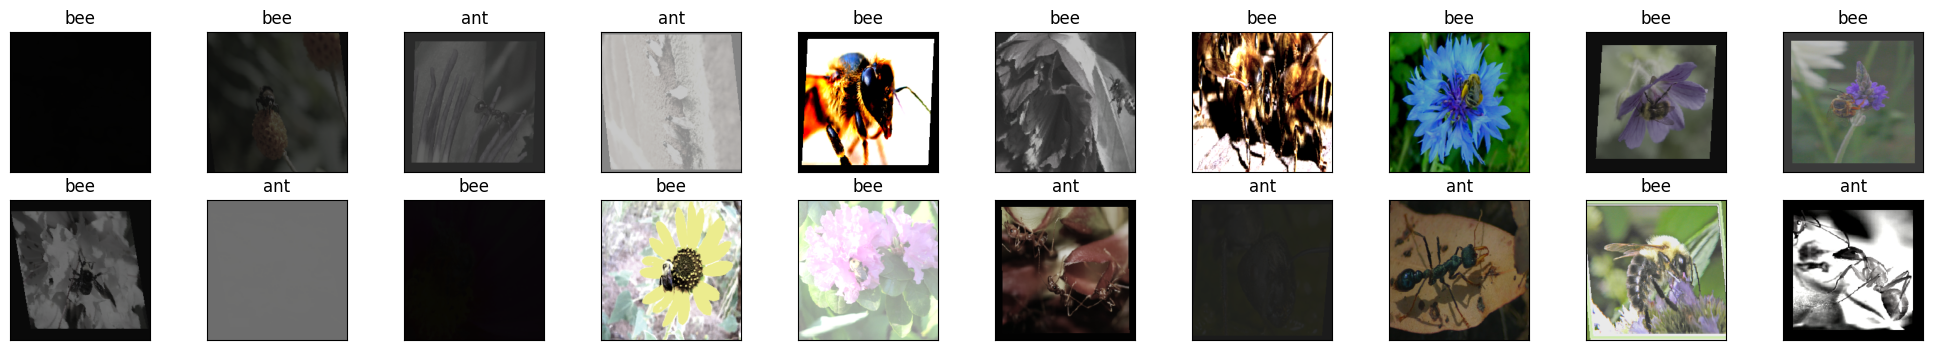

In [13]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]), cmap='gray')
  ax.set_title(classes[labels[idx].item()])


In [14]:
## replace alexnet with vgg16 to use vggnet
# model = models.alexnet(pretrained=True)
model = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
# Freezing the features parameters i.e they are not trained
for param in model.features.parameters():
  param.requires_grad = False

In [17]:
import torch.nn as nn

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(in_features=n_inputs,out_features=len(classes))
model.classifier[6] = last_layer
model.to(device)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
for p in model.parameters():
  if p.requires_grad:
    print(p.numel())
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)

102760448
4096
16777216
4096
8192
2
119554050


In [19]:
# @title Cross Entropy Loss Example
# import torch
# import torch.nn as nn

# # Define some sample input data and labels.
# input_data = torch.Tensor([[0, 0.5, 1],[1,0.5,0]])  # 2 samples, 3 classes.
# weight = torch.Tensor([0,1,2])
# print(input_data)
# labels = torch.LongTensor([2, 1 ])  # target class indices.
# print(labels)
# # Create a criterion that measures the cross entropy loss.
# criterion = nn.CrossEntropyLoss(weight=weight)

# # Compute the loss.
# loss = criterion(input_data, labels)

# # Print the loss.
# print(loss)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [21]:
epochs = 5
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for i in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _,preds = torch.max(outputs, 1)  # this gives indices of max elements
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels)

  epoch_loss = running_loss/len(training_loader.dataset)
  epoch_acc = running_corrects.float()/len(training_loader.dataset)
  running_loss_history.append(epoch_loss)
  running_corrects_history.append(epoch_acc)
  print(f"epoch {i+1}:")
  print('training loss:{:.4f}, training accuracy:{:.4f}'.format(epoch_loss, epoch_acc.item()))
  # Testing with Validation Dataset
  with torch.no_grad():
    for val_inputs, val_labels in validation_loader:
      val_inputs = val_inputs.to(device)
      val_labels = val_labels.to(device)
      val_outputs = model.forward(val_inputs)
      val_loss = criterion(val_outputs, val_labels)

      _,val_preds = torch.max(val_outputs, 1)
      val_running_loss += val_loss.item()
      val_running_corrects += torch.sum(val_preds == val_labels)
  val_epoch_loss = val_running_loss/len(validation_loader.dataset)
  val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
  val_running_loss_history.append(val_epoch_loss)
  val_running_corrects_history.append(val_epoch_acc)
  print('Validation loss:{:.4f}, Validation Accuracy:{:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))
  print("\n")




epoch 1:
training loss:0.0334, training accuracy:0.6680
Validation loss:0.0121, Validation Accuracy:0.9085


epoch 2:
training loss:0.0171, training accuracy:0.8279
Validation loss:0.0119, Validation Accuracy:0.9150


epoch 3:
training loss:0.0169, training accuracy:0.8238
Validation loss:0.0141, Validation Accuracy:0.9216


epoch 4:
training loss:0.0117, training accuracy:0.8934
Validation loss:0.0144, Validation Accuracy:0.9216


epoch 5:
training loss:0.0121, training accuracy:0.9098
Validation loss:0.0124, Validation Accuracy:0.9216




Text(0.5, 1.0, 'Loss')

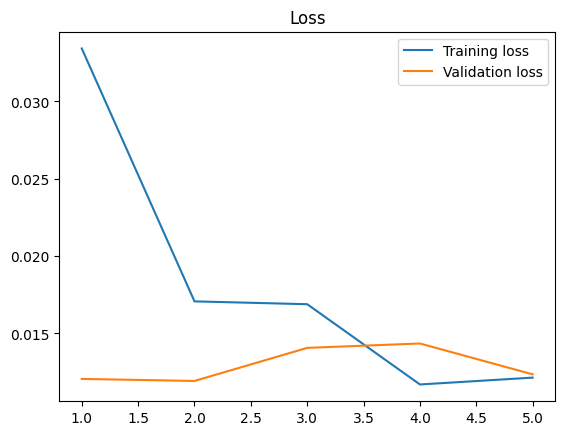

In [22]:
plt.plot(range(1,epochs+1),running_loss_history,label='Training loss')
plt.plot(range(1,epochs+1),val_running_loss_history, label="Validation loss")
plt.legend()
plt.title("Loss")

**Note: Here validation loss is less than training loss bcz validation datset is too simple,but in reality validation or testing error always greater than training error**

Text(0.5, 1.0, 'Accuracy')

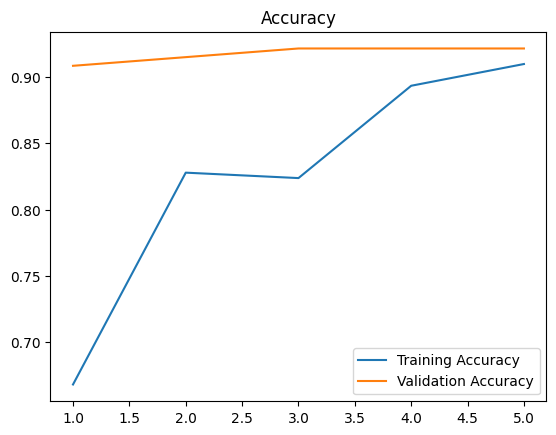

In [23]:
running_corrects_history = np.array([t.cpu().numpy() for t in running_corrects_history])
val_running_corrects_history = np.array([t.cpu().numpy() for t in val_running_corrects_history])
plt.plot(range(1,epochs+1),running_corrects_history,label='Training Accuracy')
plt.plot(range(1,epochs+1),val_running_corrects_history,label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")


Text(0.5, 1.0, 'Error')

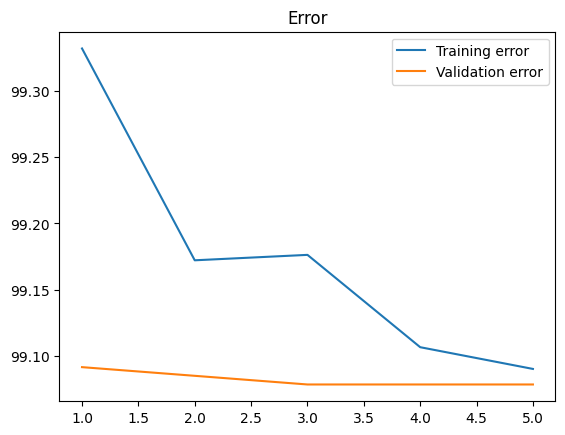

In [24]:
plt.plot(range(1,epochs+1),100-np.array(running_corrects_history),label='Training error')
plt.plot(range(1,epochs+1),100-np.array(val_running_corrects_history),label='Validation error')
plt.legend()
plt.title("Error")

**Testing with new image from internet**

--2023-10-28 17:36:58--  https://s.abcnews.com/images/US/bees-1-gty-jt-180720_hpMain_16x9_1600.jpg
Resolving s.abcnews.com (s.abcnews.com)... 13.32.87.68, 13.32.87.73, 13.32.87.24, ...
Connecting to s.abcnews.com (s.abcnews.com)|13.32.87.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159707 (156K) [image/jpeg]
Saving to: ‘downloaded_image.jpg’

downloaded_image.jp 100%[===================>] 155.96K  --.-KB/s    in 0.09s   

2023-10-28 17:36:58 (1.74 MB/s) - ‘downloaded_image.jpg’ saved [159707/159707]



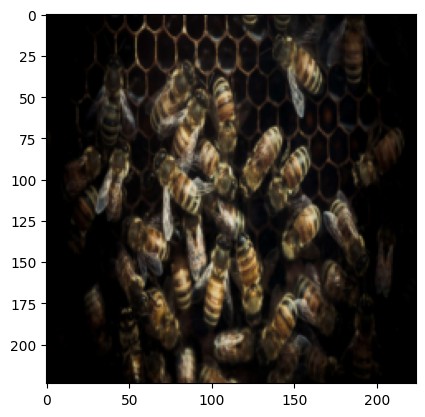

In [32]:
!wget 'https://s.abcnews.com/images/US/bees-1-gty-jt-180720_hpMain_16x9_1600.jpg' -O downloaded_image.jpg
import cv2 as cv
from PIL import Image
img1 = cv.imread('downloaded_image.jpg')
img = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
img1 = Image.fromarray(img)
img1 = transform(img1)
plt.imshow(im_convert(img1))
plt.show()

In [33]:
# img1 = img1.view(img1.shape[0],-1)
# print(img1.shape)
pred = model(img1.to(device).unsqueeze(0))
_,pred_label = torch.max(pred, 1)
print(classes[pred_label.item()])


bee


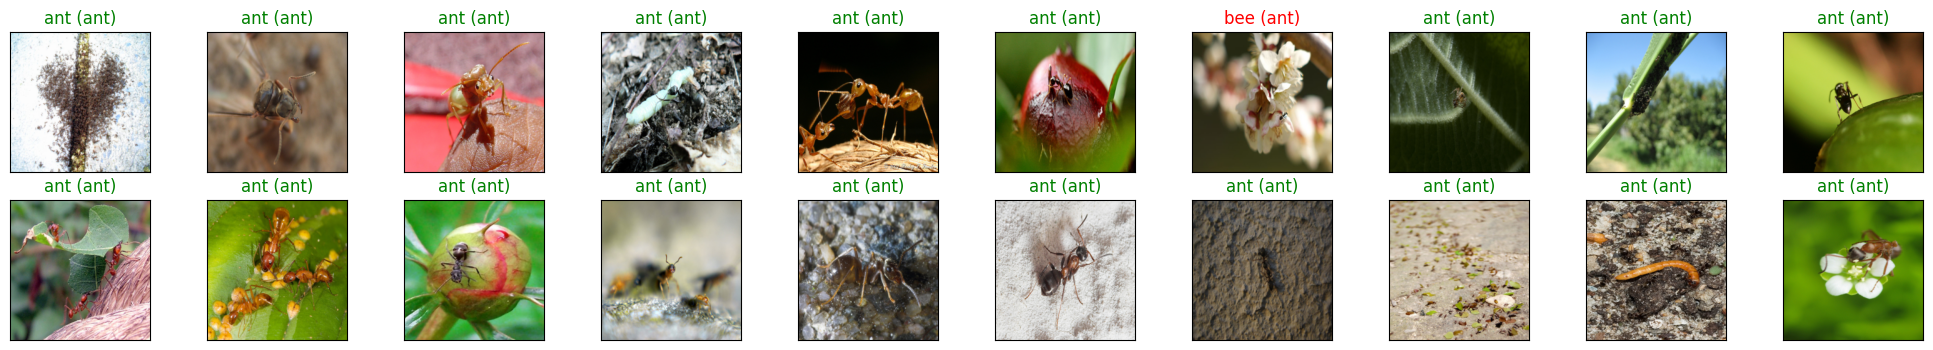

In [31]:
# Testing on set of valiadation images
dataiter = iter(validation_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output,1)
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx].cpu()), cmap='gray')
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))